<a href="https://colab.research.google.com/github/marinapor/Mis-tareas/blob/master/TareaAnalisisExploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTAR LIBRERIAS, CARGAR EL ARCHIVO CON LOS DATOS Y HACER UN RESPALDO DEL DATA FRAME

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import io
import math

from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Coffee-modified.csv")
df_respaldo = df.copy()
df.head()

Saving Coffee-modified.csv to Coffee-modified.csv


,ID,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.5,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.5,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0,0,0,NaN,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89,0.11,0,0,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.5,8.25,8.5,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


OBTENER INFORMACION DEL TIPO DE DATOS QUE SE TIENEN, NUMERO DE FILAS Y COLUMNAS

In [3]:
df.info()
columns = len(df.columns)
rows = len(df)
rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 44 columns):
ID                       1312 non-null object
Species                  1319 non-null object
Owner                    1310 non-null object
Country.of.Origin        1316 non-null object
Farm.Name                961 non-null object
Lot.Number               276 non-null object
Mill                     1007 non-null object
ICO.Number               1169 non-null object
Company                  1105 non-null object
Altitude                 1092 non-null object
Region                   1257 non-null object
Producer                 1084 non-null object
Number.of.Bags           1314 non-null object
Bag.Weight               1314 non-null object
In.Country.Partner       1314 non-null object
Harvest.Year             1266 non-null object
Grading.Date             1313 non-null object
Owner.1                  1305 non-null object
Variety                  1110 non-null object
Processing.Method    

1319

REVISAR ESPACIOS VACIOS. ME DOY CUENTA DE QUE EN VERDAD NO HAY MUCHOS FALTANTES Y YO CONSIDERO QUE NO AFECTARÍA EN GRAN MEDIDA QUITAR LOS ESPACIOS NULOS. CLARO QUE CADA FINCA FUE TOMADA EN CUENTA POR ALGO Y QUE TODAS LAS QUE FIGURAN TIENEN IMPORTANCIA A NIVEL MUNDIAL, PERO PARA FINES DE ANALISIS SE PUEDEN QUITAR.

In [4]:
df.isnull().sum()

ID                          7
Species                     0
Owner                       9
Country.of.Origin           3
Farm.Name                 358
Lot.Number               1043
Mill                      312
ICO.Number                150
Company                   214
Altitude                  227
Region                     62
Producer                  235
Number.of.Bags              5
Bag.Weight                  5
In.Country.Partner          5
Harvest.Year               53
Grading.Date                6
Owner.1                    14
Variety                   209
Processing.Method         160
Aroma                       8
Flavor                     10
Aftertaste                 10
Acidity                    10
Body                       10
Balance                    10
Uniformity                 10
Clean.Cup                  12
Sweetness                  11
Cupper.Points              11
Total.Cup.Points           11
Moisture                   11
Category.One.Defects       11
Quakers   

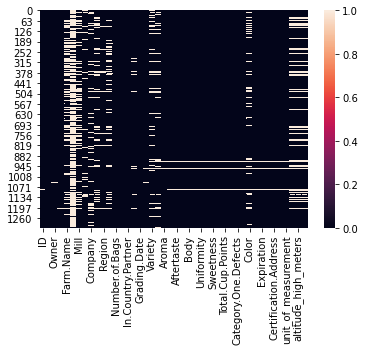

In [5]:
sns.heatmap(df.isnull())

DECIDO APLICAR UN DROP PARA HACER ANALISIS ESTADÍSTICO

In [6]:
df.dropna(axis=0, inplace=True)
df

,ID,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
29,30,Arabica,"lin, che-hao krude ???",Taiwan,tsoustructive garden ???,Tsoustructive 2015 Sumatra Typica,tsoustructive garden ???,Taiwan,taiwan coffee laboratory,1200,"leye, alishan township, chiayi county","FANG,ZHENG-LUN ???",20,50 kg,Specialty Coffee Association,2015,"May 18th, 2016","Lin, Che-Hao Krude ???",Sumatra,Pulped natural / honey,8,8,8,8.25,8.00,8.17,10.00,10.00,10.00,8.17,86.58,0,0,0,Green,0.0,"May 18th, 2017",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1200.0,1200.0,1200.0
115,116,Arabica,"lin, che-hao krude ???",Taiwan,shi fang yuan ???,2016 Tainan Coffee Cupping Event Micro Lot ???...,shi fang yuan ???,Taiwan,taiwan coffee laboratory,350,"dongshan dist., tainan city ??????",Wang Chao Yung ???,10,20 kg,Specialty Coffee Association,2016,"May 18th, 2016","Lin, Che-Hao Krude ???",Typica,Natural / Dry,7.92,7.58,7.83,7.83,7.83,7.83,10.00,10.00,10.00,8,84.83,0,0,0,Green,0.0,"May 18th, 2017",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.0,350.0,350.0
125,126,Arabica,consejo salvadoreÃ±o del cafÃ©,El Salvador,monterrey,1-71,j.j. borja nathan,09-392-69,cafetalera del pacifico,1350,apaneca,J.J. Borja Nathan,150,69 kg,Salvadoran Coffee Council,2016,"June 26th, 2017",Consejo SalvadoreÃ±o del CafÃ©,Bourbon,Washed / Wet,7.83,7.83,7.5,8,7.83,7.67,10.00,10.00,10.00,8,84.67,0,0,0,Blue-Green,2.0,"June 26th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
128,129,Arabica,rodrigo soto,Costa Rica,rio jorco,Tarrazu,rio jorco,5-423-0128,panamerican coffee trading,1150,tarrazu,Johanna,15,69 kg,Specialty Coffee Association of Costa Rica,2015,"October 4th, 2016",Rodrigo Soto,Catuai,Washed / Wet,8.08,7.75,7.67,7.83,7.50,7.92,10.00,10.00,10.00,7.92,84.67,0.1,0,0,Blue-Green,2.0,"October 4th, 2017",Specialty Coffee Association of Costa Rica,8e0b118f3cf3121ab27c5387deacdb7d4d2a60b1,5eb2b7129d9714c43825e44dc3bca9423de209e9,m,1150.0,1150.0,1150.0
129,130,Arabica,juan luis alvarado romero,Guatemala,san diego buena vista,11/08/0109,san diego buena vista,11/08/0109,"waelti schoenfeld exportadores de cafe, s.a.",1600,acatenango,JUAN BOCK,120,34 kg,Asociacion Nacional Del CafÃ©,2015,"June 1st, 2016",Juan Luis Alvarado Romero,Bourbon,Washed / Wet,7.75,7.83,7.58,8,7.92,7.75,10.00,10.00,10.00,7.83,84.67,0.1,0,0,Green,1.0,"June 1st, 2017",Asociacion Nacional Del CafÃ©,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1600.0,1600.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,1193,Arabica,juan luis alvarado romero,Guatemala,las merceditas,11/23/0693,beneficio ixchel,11/23/0693,"unex guatemala, s.a.",1700,san marcos,ANGEL DE LEON,50,69 kg,Asociacion Nacional Del CafÃ©,2017,"August 23rd, 2017",Juan Luis Alvarado Romero,Bourbon,Washed / Wet,7.58,7.67,7.42,7.42,7.67,7.67,8.67,8.67,8.67,7.67,79.08,0.1,0,0,Green,1.0,"August 23rd, 2018",Asociacion Nacional Del CafÃ©,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1700.0,1700.0,1700.0
1213,1207,Arabica,"exportadora atlantic, s.a.",Nicaragua,finca las marÃ­as,017-053-0211/053-0212,beneficio atlantic condega,017-053-0211/053-0212,exportadora atlant

ELIMINO LA COLUMNA CON INFORMACIÓN SOBRE EL NUMERO DE LOTES PORQUE NO ES RELEVANTE Y POR TENER DEMASIADOS FALTANTES.

In [7]:
df.drop( columns=["Lot.Number"], inplace=True)
df
 


,ID,Species,Owner,Country.of.Origin,Farm.Name,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
29,30,Arabica,"lin, che-hao krude ???",Taiwan,tsoustructive garden ???,tsoustructive garden ???,Taiwan,taiwan coffee laboratory,1200,"leye, alishan township, chiayi county","FANG,ZHENG-LUN ???",20,50 kg,Specialty Coffee Association,2015,"May 18th, 2016","Lin, Che-Hao Krude ???",Sumatra,Pulped natural / honey,8,8,8,8.25,8.00,8.17,10.00,10.00,10.00,8.17,86.58,0,0,0,Green,0.0,"May 18th, 2017",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1200.0,1200.0,1200.0
115,116,Arabica,"lin, che-hao krude ???",Taiwan,shi fang yuan ???,shi fang yuan ???,Taiwan,taiwan coffee laboratory,350,"dongshan dist., tainan city ??????",Wang Chao Yung ???,10,20 kg,Specialty Coffee Association,2016,"May 18th, 2016","Lin, Che-Hao Krude ???",Typica,Natural / Dry,7.92,7.58,7.83,7.83,7.83,7.83,10.00,10.00,10.00,8,84.83,0,0,0,Green,0.0,"May 18th, 2017",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.0,350.0,350.0
125,126,Arabica,consejo salvadoreÃ±o del cafÃ©,El Salvador,monterrey,j.j. borja nathan,09-392-69,cafetalera del pacifico,1350,apaneca,J.J. Borja Nathan,150,69 kg,Salvadoran Coffee Council,2016,"June 26th, 2017",Consejo SalvadoreÃ±o del CafÃ©,Bourbon,Washed / Wet,7.83,7.83,7.5,8,7.83,7.67,10.00,10.00,10.00,8,84.67,0,0,0,Blue-Green,2.0,"June 26th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
128,129,Arabica,rodrigo soto,Costa Rica,rio jorco,rio jorco,5-423-0128,panamerican coffee trading,1150,tarrazu,Johanna,15,69 kg,Specialty Coffee Association of Costa Rica,2015,"October 4th, 2016",Rodrigo Soto,Catuai,Washed / Wet,8.08,7.75,7.67,7.83,7.50,7.92,10.00,10.00,10.00,7.92,84.67,0.1,0,0,Blue-Green,2.0,"October 4th, 2017",Specialty Coffee Association of Costa Rica,8e0b118f3cf3121ab27c5387deacdb7d4d2a60b1,5eb2b7129d9714c43825e44dc3bca9423de209e9,m,1150.0,1150.0,1150.0
129,130,Arabica,juan luis alvarado romero,Guatemala,san diego buena vista,san diego buena vista,11/08/0109,"waelti schoenfeld exportadores de cafe, s.a.",1600,acatenango,JUAN BOCK,120,34 kg,Asociacion Nacional Del CafÃ©,2015,"June 1st, 2016",Juan Luis Alvarado Romero,Bourbon,Washed / Wet,7.75,7.83,7.58,8,7.92,7.75,10.00,10.00,10.00,7.83,84.67,0.1,0,0,Green,1.0,"June 1st, 2017",Asociacion Nacional Del CafÃ©,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1600.0,1600.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,1193,Arabica,juan luis alvarado romero,Guatemala,las merceditas,beneficio ixchel,11/23/0693,"unex guatemala, s.a.",1700,san marcos,ANGEL DE LEON,50,69 kg,Asociacion Nacional Del CafÃ©,2017,"August 23rd, 2017",Juan Luis Alvarado Romero,Bourbon,Washed / Wet,7.58,7.67,7.42,7.42,7.67,7.67,8.67,8.67,8.67,7.67,79.08,0.1,0,0,Green,1.0,"August 23rd, 2018",Asociacion Nacional Del CafÃ©,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1700.0,1700.0,1700.0
1213,1207,Arabica,"exportadora atlantic, s.a.",Nicaragua,finca las marÃ­as,beneficio atlantic condega,017-053-0211/053-0212,exportadora atlantic s.a,1100,jalapa,TeÃ³filo NarvÃ¡ez,1,1 kg,Instituto HondureÃ±o del CafÃ©,2016,"May 22nd, 2017","Exportadora Atlantic, S.A.",Caturra,Other,7.17,7,6.92,7,7.

ANALISIS UNIVARIADO

PARA PODER HACER UN ANALISIS DE LAS CARACTERISTICAS PRINCIPALES DE LOS GRANOS SE CONVIERTEN VARIAS COLUMNAS QUE SON TIPO OBJECT A FLOAT.

In [8]:
df.Aroma = df.Aroma.astype(float)
df.Aroma.dtype


dtype('float64')

ANALISIS DELOS CUATRO MOMENTOS ESTADÍSTICOS PARA CADA UNA DE LAS VARIABLES IMPORTANTES EN EL ESTUDIO DE LA CALIDAD DE LAS MUESTRAS. SE VIÓ QUE POR LA CANTIDAD DE  LAS MUESTRAS ERA MEJOR USAR 30 BINS YA Q MENOS NO SE PODÍA APRECIAR LOS DETALLES Y MÁS YA NO MOSTRABA NINGÚN BENEFICIO RELEVANTE.

Mean: 7.566846153846153
Median: 7.58
Std Dev: 0.16896417039291298
Skew: 0.08244979960238122
Kurtosis: 0.8173053458455444
Percentil 25: 7.5
Percentil 50: 7.58
Percentil 75: 7.67


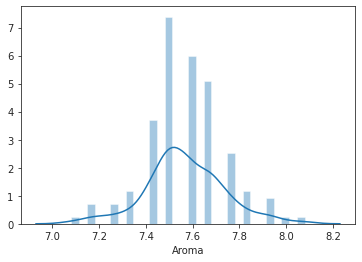

In [10]:
mean = df['Aroma'].mean()
median = df['Aroma'].median()
std = df['Aroma'].std()
skew = df['Aroma'].skew()
kurt = df['Aroma'].kurtosis()
print("Mean:", mean)
print("Median:", median)
print("Std Dev:", std)
print("Skew:", skew)
print("Kurtosis:", kurt)

per25 = np.percentile(df['Aroma'], 25)
print("Percentil 25:", per25)
per50 = np.percentile(df['Aroma'], 50)
print("Percentil 50:", per50)
per75 = np.percentile(df['Aroma'], 75)
print("Percentil 75:", per75)
sns.set_style("ticks", {"xtick.major.size": 1, "ytick.major.size": 5})
sns.distplot(df['Aroma'], bins=30)

In [50]:
df.Flavor = df.Flavor.astype(float)
df.Flavor.dtype


dtype('float64')

Mean: 7.55169230769231
Median: 7.58
Std Dev: 0.21759124776323246
Skew: -1.106020403054818
Kurtosis: 2.758094862261303
Percentil 25: 7.5
Percentil 50: 7.58
Percentil 75: 7.67


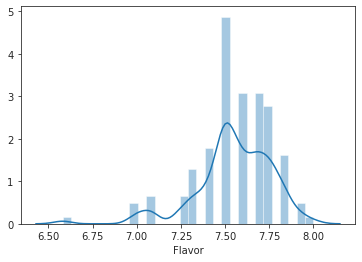

In [51]:
mean_flavor = df['Flavor'].mean()
median_flavor = df['Flavor'].median()
std_flavor = df['Flavor'].std()
skew_flavor = df['Flavor'].skew()
kurt_flavor = df['Flavor'].kurtosis()
print("Mean:", mean_flavor)
print("Median:", median_flavor)
print("Std Dev:", std_flavor)
print("Skew:", skew_flavor)
print("Kurtosis:", kurt_flavor)

per25_flavor= np.percentile(df['Flavor'], 25)
print("Percentil 25:", per25_flavor)
per50_flavor = np.percentile(df['Flavor'], 50)
print("Percentil 50:", per50_flavor)
per75_flavor = np.percentile(df['Flavor'], 75)
print("Percentil 75:", per75_flavor)
sns.set_style("ticks", {"xtick.major.size": 1, "ytick.major.size": 5})
sns.distplot(df['Flavor'], bins=30)

In [13]:
df.Acidity = df.Acidity.astype(float)
df.Acidity.dtype


dtype('float64')

Mean: 7.57984615384615
Median: 7.58
Std Dev: 0.26169389958139194
Skew: -1.106020403054818
Kurtosis: 4.997245716024905
Percentil 25: 7.5
Percentil 50: 7.58
Percentil 75: 7.75


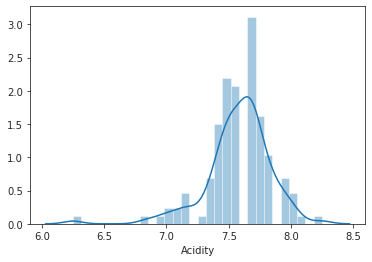

In [14]:
mean_aci = df['Acidity'].mean()
median_aci = df['Acidity'].median()
std_aci = df['Acidity'].std()
skew_aci = df['Acidity'].skew()
kurt_aci = df['Acidity'].kurtosis()
print("Mean:", mean_aci)
print("Median:", median_aci)
print("Std Dev:", std_aci)
print("Skew:", skew_flavor)
print("Kurtosis:", kurt_aci)

per25_aci= np.percentile(df['Acidity'], 25)
print("Percentil 25:", per25_aci)
per50_aci = np.percentile(df['Acidity'], 50)
print("Percentil 50:", per50_aci)
per75_aci = np.percentile(df['Acidity'], 75)
print("Percentil 75:", per75_aci)
sns.set_style("ticks", {"xtick.major.size": 1, "ytick.major.size": 5})
sns.distplot(df['Acidity'], bins=30)

ALGUNOS NOMBRES DE COLUMNAS DEL FRAME ORIGINAL DAN PROBLEMAS POR EL USO DE PUNTOS Y LOS MODIFICO

In [15]:
df.rename(columns={"Total.Cup.Points" : "TotalCupPoints"}, inplace=True)
df

,ID,Species,Owner,Country.of.Origin,Farm.Name,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,TotalCupPoints,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
29,30,Arabica,"lin, che-hao krude ???",Taiwan,tsoustructive garden ???,tsoustructive garden ???,Taiwan,taiwan coffee laboratory,1200,"leye, alishan township, chiayi county","FANG,ZHENG-LUN ???",20,50 kg,Specialty Coffee Association,2015,"May 18th, 2016","Lin, Che-Hao Krude ???",Sumatra,Pulped natural / honey,8.00,8.00,8,8.25,8.00,8.17,10.00,10.00,10.00,8.17,86.58,0,0,0,Green,0.0,"May 18th, 2017",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1200.0,1200.0,1200.0
115,116,Arabica,"lin, che-hao krude ???",Taiwan,shi fang yuan ???,shi fang yuan ???,Taiwan,taiwan coffee laboratory,350,"dongshan dist., tainan city ??????",Wang Chao Yung ???,10,20 kg,Specialty Coffee Association,2016,"May 18th, 2016","Lin, Che-Hao Krude ???",Typica,Natural / Dry,7.92,7.58,7.83,7.83,7.83,7.83,10.00,10.00,10.00,8,84.83,0,0,0,Green,0.0,"May 18th, 2017",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.0,350.0,350.0
125,126,Arabica,consejo salvadoreÃ±o del cafÃ©,El Salvador,monterrey,j.j. borja nathan,09-392-69,cafetalera del pacifico,1350,apaneca,J.J. Borja Nathan,150,69 kg,Salvadoran Coffee Council,2016,"June 26th, 2017",Consejo SalvadoreÃ±o del CafÃ©,Bourbon,Washed / Wet,7.83,7.83,7.5,8.00,7.83,7.67,10.00,10.00,10.00,8,84.67,0,0,0,Blue-Green,2.0,"June 26th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
128,129,Arabica,rodrigo soto,Costa Rica,rio jorco,rio jorco,5-423-0128,panamerican coffee trading,1150,tarrazu,Johanna,15,69 kg,Specialty Coffee Association of Costa Rica,2015,"October 4th, 2016",Rodrigo Soto,Catuai,Washed / Wet,8.08,7.75,7.67,7.83,7.50,7.92,10.00,10.00,10.00,7.92,84.67,0.1,0,0,Blue-Green,2.0,"October 4th, 2017",Specialty Coffee Association of Costa Rica,8e0b118f3cf3121ab27c5387deacdb7d4d2a60b1,5eb2b7129d9714c43825e44dc3bca9423de209e9,m,1150.0,1150.0,1150.0
129,130,Arabica,juan luis alvarado romero,Guatemala,san diego buena vista,san diego buena vista,11/08/0109,"waelti schoenfeld exportadores de cafe, s.a.",1600,acatenango,JUAN BOCK,120,34 kg,Asociacion Nacional Del CafÃ©,2015,"June 1st, 2016",Juan Luis Alvarado Romero,Bourbon,Washed / Wet,7.75,7.83,7.58,8.00,7.92,7.75,10.00,10.00,10.00,7.83,84.67,0.1,0,0,Green,1.0,"June 1st, 2017",Asociacion Nacional Del CafÃ©,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1600.0,1600.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,1193,Arabica,juan luis alvarado romero,Guatemala,las merceditas,beneficio ixchel,11/23/0693,"unex guatemala, s.a.",1700,san marcos,ANGEL DE LEON,50,69 kg,Asociacion Nacional Del CafÃ©,2017,"August 23rd, 2017",Juan Luis Alvarado Romero,Bourbon,Washed / Wet,7.58,7.67,7.42,7.42,7.67,7.67,8.67,8.67,8.67,7.67,79.08,0.1,0,0,Green,1.0,"August 23rd, 2018",Asociacion Nacional Del CafÃ©,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1700.0,1700.0,1700.0
1213,1207,Arabica,"exportadora atlantic, s.a.",Nicaragua,finca las marÃ­as,beneficio atlantic condega,017-053-0211/053-0212,exportadora atlantic s.a,1100,jalapa,TeÃ³filo NarvÃ¡ez,1,1 kg,Instituto HondureÃ±o del CafÃ©,2016,"May 22nd, 2017","Exportadora Atlantic, S.A.",Caturra,Other,7.17,7

In [16]:
df.TotalCupPoints = df.TotalCupPoints.astype(float)
df.TotalCupPoints.dtype

dtype('float64')

Mean: 82.75
Median: 82.75
Std Dev: 2.2799227983874886
Skew: -4.897242426298704
Kurtosis: 39.053107962735346
Percentil 25: 81.77
Percentil 50: 82.75
Percentil 75: 83.58


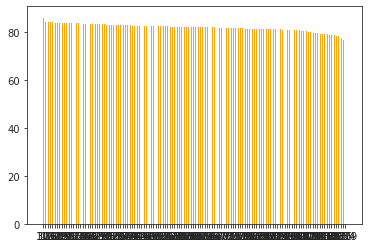

In [17]:

median_puntos = df['TotalCupPoints'].median()
std_puntos = df['TotalCupPoints'].std()
skew_puntos = df['TotalCupPoints'].skew()
kurt_puntos = df['TotalCupPoints'].kurtosis()
print("Mean:", median_puntos)
print("Median:", median_puntos)
print("Std Dev:", std_puntos)
print("Skew:", skew_puntos)
print("Kurtosis:", kurt_puntos)

per25_puntos= np.percentile(df['TotalCupPoints'], 25)
print("Percentil 25:", per25_puntos)
per50_puntos = np.percentile(df['TotalCupPoints'], 50)
print("Percentil 50:", per50_puntos)
per75_puntos = np.percentile(df['TotalCupPoints'], 75)
print("Percentil 75:", per75_puntos)

plt.bar( df["ID"], df["TotalCupPoints"], color="orange")
plt.show()

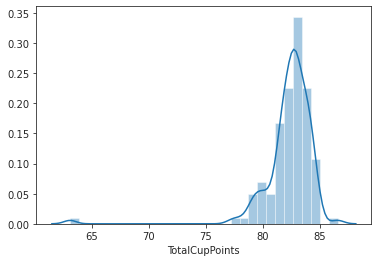

In [18]:
sns.distplot(df["TotalCupPoints"], 30)

ANALISIS BIVARIADO

In [19]:
#NUEVAMENTE ES IMPORTANTE QUITAR PUNTOS DE LOS NOMBRES DE COLUMNAS , BORRAR ESPACIOS VACÍOS Y CAMBIAR LOS DATOS A VALORES NUMÉRICOS
df.rename(columns={"Cupper.Points" : "CupperPoints"}, inplace=True)
df.dropna()
df

,ID,Species,Owner,Country.of.Origin,Farm.Name,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,CupperPoints,TotalCupPoints,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
29,30,Arabica,"lin, che-hao krude ???",Taiwan,tsoustructive garden ???,tsoustructive garden ???,Taiwan,taiwan coffee laboratory,1200,"leye, alishan township, chiayi county","FANG,ZHENG-LUN ???",20,50 kg,Specialty Coffee Association,2015,"May 18th, 2016","Lin, Che-Hao Krude ???",Sumatra,Pulped natural / honey,8.00,8.00,8,8.25,8.00,8.17,10.00,10.00,10.00,8.17,86.58,0,0,0,Green,0.0,"May 18th, 2017",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1200.0,1200.0,1200.0
115,116,Arabica,"lin, che-hao krude ???",Taiwan,shi fang yuan ???,shi fang yuan ???,Taiwan,taiwan coffee laboratory,350,"dongshan dist., tainan city ??????",Wang Chao Yung ???,10,20 kg,Specialty Coffee Association,2016,"May 18th, 2016","Lin, Che-Hao Krude ???",Typica,Natural / Dry,7.92,7.58,7.83,7.83,7.83,7.83,10.00,10.00,10.00,8,84.83,0,0,0,Green,0.0,"May 18th, 2017",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.0,350.0,350.0
125,126,Arabica,consejo salvadoreÃ±o del cafÃ©,El Salvador,monterrey,j.j. borja nathan,09-392-69,cafetalera del pacifico,1350,apaneca,J.J. Borja Nathan,150,69 kg,Salvadoran Coffee Council,2016,"June 26th, 2017",Consejo SalvadoreÃ±o del CafÃ©,Bourbon,Washed / Wet,7.83,7.83,7.5,8.00,7.83,7.67,10.00,10.00,10.00,8,84.67,0,0,0,Blue-Green,2.0,"June 26th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
128,129,Arabica,rodrigo soto,Costa Rica,rio jorco,rio jorco,5-423-0128,panamerican coffee trading,1150,tarrazu,Johanna,15,69 kg,Specialty Coffee Association of Costa Rica,2015,"October 4th, 2016",Rodrigo Soto,Catuai,Washed / Wet,8.08,7.75,7.67,7.83,7.50,7.92,10.00,10.00,10.00,7.92,84.67,0.1,0,0,Blue-Green,2.0,"October 4th, 2017",Specialty Coffee Association of Costa Rica,8e0b118f3cf3121ab27c5387deacdb7d4d2a60b1,5eb2b7129d9714c43825e44dc3bca9423de209e9,m,1150.0,1150.0,1150.0
129,130,Arabica,juan luis alvarado romero,Guatemala,san diego buena vista,san diego buena vista,11/08/0109,"waelti schoenfeld exportadores de cafe, s.a.",1600,acatenango,JUAN BOCK,120,34 kg,Asociacion Nacional Del CafÃ©,2015,"June 1st, 2016",Juan Luis Alvarado Romero,Bourbon,Washed / Wet,7.75,7.83,7.58,8.00,7.92,7.75,10.00,10.00,10.00,7.83,84.67,0.1,0,0,Green,1.0,"June 1st, 2017",Asociacion Nacional Del CafÃ©,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1600.0,1600.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,1193,Arabica,juan luis alvarado romero,Guatemala,las merceditas,beneficio ixchel,11/23/0693,"unex guatemala, s.a.",1700,san marcos,ANGEL DE LEON,50,69 kg,Asociacion Nacional Del CafÃ©,2017,"August 23rd, 2017",Juan Luis Alvarado Romero,Bourbon,Washed / Wet,7.58,7.67,7.42,7.42,7.67,7.67,8.67,8.67,8.67,7.67,79.08,0.1,0,0,Green,1.0,"August 23rd, 2018",Asociacion Nacional Del CafÃ©,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1700.0,1700.0,1700.0
1213,1207,Arabica,"exportadora atlantic, s.a.",Nicaragua,finca las marÃ­as,beneficio atlantic condega,017-053-0211/053-0212,exportadora atlantic s.a,1100,jalapa,TeÃ³filo NarvÃ¡ez,1,1 kg,Instituto HondureÃ±o del CafÃ©,2016,"May 22nd, 2017","Exportadora Atlantic, S.A.",Caturra,Other,7.17,7.

In [20]:
df.CupperPoints = df.CupperPoints.astype(float)
df.CupperPoints.dtype

dtype('float64')

In [21]:
r, p = st.pearsonr(df.altitude_mean_meters, df.CupperPoints)
r, p

(-0.04842150903006375, 0.5843244421000254)

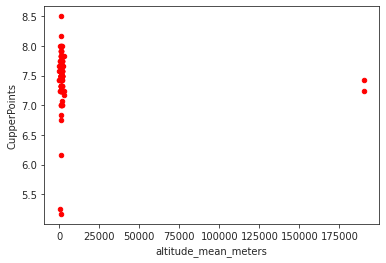

In [22]:
df.plot("altitude_mean_meters", "CupperPoints", kind="scatter", color ="red")
plt.show()


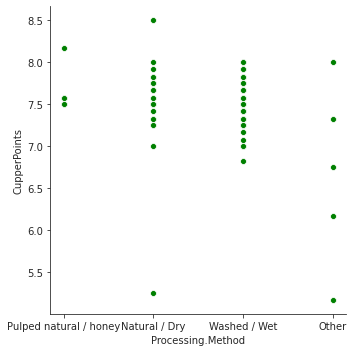

In [23]:
sns.relplot(x="Processing.Method", y= "CupperPoints", data= df, kind="scatter", color="green")
plt.show()

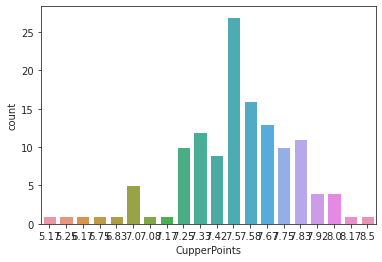

In [24]:
sns.countplot(x=df["CupperPoints"].dropna())

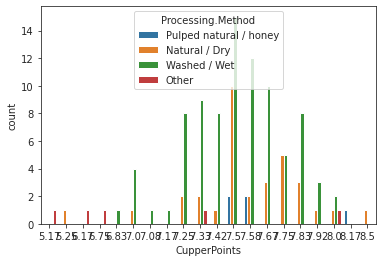

In [25]:
sns.countplot(df["CupperPoints"], hue=df["Processing.Method"])

In [26]:
df.Moisture = df.Moisture.astype(float)
df.Moisture.dtype


dtype('float64')

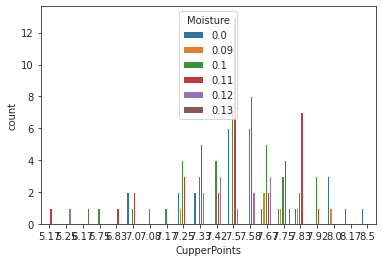

In [27]:
sns.countplot(df["CupperPoints"], hue=df["Moisture"])

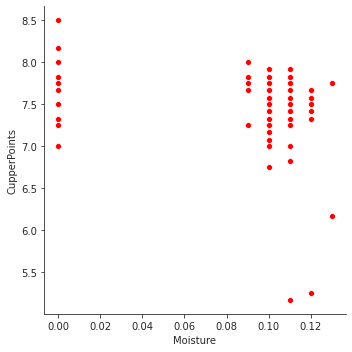

In [29]:
sns.relplot(x="Moisture", y= "CupperPoints", data=df, kind="scatter", color="red")
plt.show()

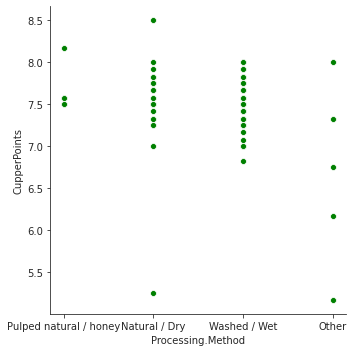

In [28]:
sns.relplot(x="Processing.Method",  y="CupperPoints", data= df, kind="scatter", color="green")
plt.show()

PIENSO QUE ES MEJOR TRABAJAR CON EL PAIS DE ORIGEN QUE CON LA REGIÓN, POR TENER QUE MANEJAR MENOS CLASES O BINS. AQUI BUSCO CORROBORAR MI SUPOSICIÓN.

In [30]:
df["Region"].unique()
df["Region"].value_counts()

south of minas                                    23
san marcos                                        11
oriente                                           10
comayagua                                         10
tarrazu                                            8
santa rosa                                         7
huehuetenango                                      4
apaneca                                            4
dongshan dist., tainan city ??????                 3
antigua                                            3
jalapa                                             3
norte                                              3
el balsamo, quezaltepec                            2
??? guoshing township                              2
marcala                                            2
el progreso                                        2
ocotepeque                                         2
kasese, mt. rwenzori                               2
leye, alishan township, chiayi county         

In [31]:
df["Country.of.Origin"].unique()
df["Country.of.Origin"].value_counts()

Guatemala                       45
Brazil                          26
Honduras                        17
Taiwan                          13
Costa Rica                       8
El Salvador                      7
Nicaragua                        5
Uganda                           4
Indonesia                        2
Tanzania, United Republic Of     1
Mexico                           1
China                            1
Name: Country.of.Origin, dtype: int64

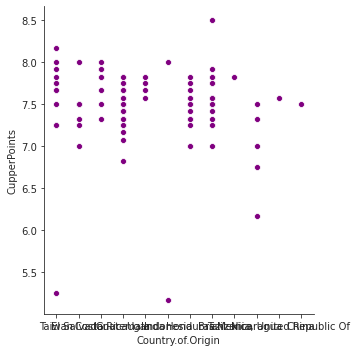

<Figure size 21600x21600 with 0 Axes>

In [32]:
sns.relplot(x="Country.of.Origin", y= "CupperPoints", data= df, kind="scatter", color="purple")

plt.figure(figsize=(300,300) )
plt.show()

In [0]:
df.groupby(by="Country.of.Origin")
df

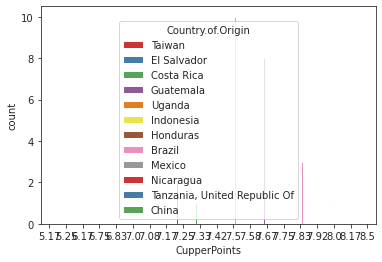

<Figure size 4320x3600 with 0 Axes>

In [34]:
sns.countplot(df["CupperPoints"], hue=df["Country.of.Origin"],palette="Set1")
plt.figure(figsize= (60,50))


plt.show()

ANALISIS MULTIVARIADO

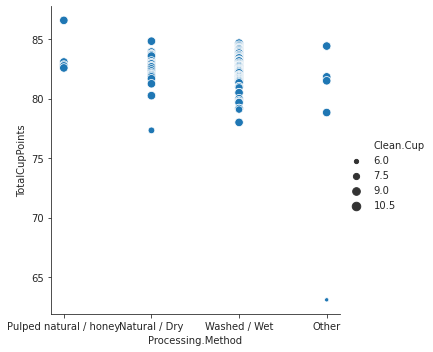

In [35]:
sns.relplot(x="Processing.Method", y="TotalCupPoints", data=df, size="Clean.Cup")
plt.show()


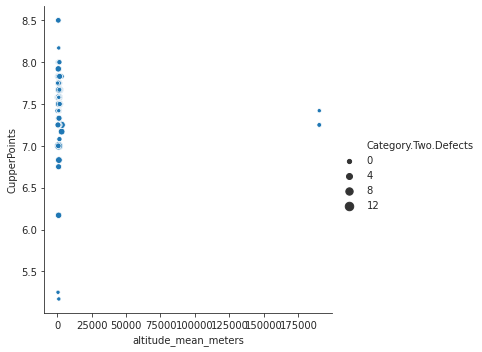

In [36]:
sns.relplot(x="altitude_mean_meters", y="CupperPoints", data=df, size="Category.Two.Defects")
plt.show()

In [37]:
df.describe()

,Aroma,Flavor,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,CupperPoints,TotalCupPoints,Moisture,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,7.566846,7.551692,7.579846,7.533385,7.500692,9.861385,9.923000,9.928077,7.493308,82.339692,0.090231,2.838462,4202.190997,4202.190997,4202.190997
std,0.168964,0.217591,0.261694,0.226430,0.251960,0.529509,0.420352,0.391675,0.406212,2.279923,0.039345,2.400917,23340.432588,23340.432588,23340.432588
min,7.080000,6.580000,6.250000,6.420000,6.080000,6.000000,6.000000,6.000000,5.170000,63.080000,0.000000,0.000000,157.886400,157.886400,157.886400
25%,7.500000,7.500000,7.500000,7.420000,7.420000,10.000000,10.000000,10.000000,7.330000,81.770000,0.100000,1.000000,936.500000,936.500000,936.500000
50%,7.580000,7.580000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.750000,0.100000,2.500000,1250.000000,1250.000000,1250.000000
75%,7.670000,7.670000,7.750000,7.670000,7.670000,10.000000,10.000000,10.000000,7.670000,83.580000,0.110000,4.000000,1591.250000,1591.250000,1591.250000
max,8.080000,8.000000,8.250000,8.000000,8.170000,10.000000,10.000000,10.000000,8.500000,86.580000,0.130000,12.000000,190164.000000,190164.000000,190164.000000


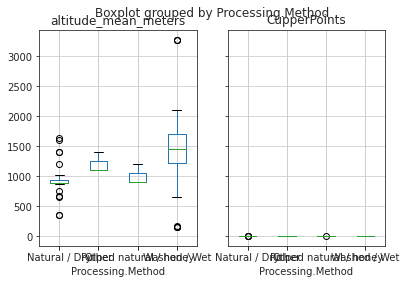

In [45]:
df1 = df [ df.altitude_mean_meters < 50000 ]
boxplot= df1.boxplot(column= [ "altitude_mean_meters", "CupperPoints"] , by="Processing.Method")

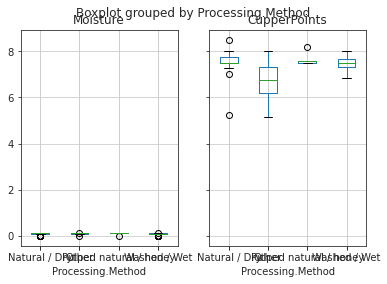

In [46]:
boxplot= df1.boxplot(column= [ "Moisture", "CupperPoints"] , by="Processing.Method")

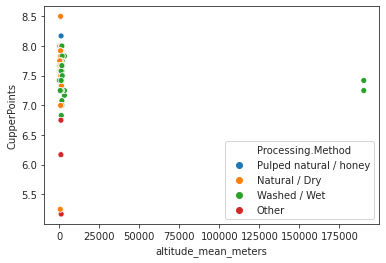

In [49]:
sns.scatterplot( df["altitude_mean_meters"], df["CupperPoints"] , hue=df["Processing.Method"])
plt.show()

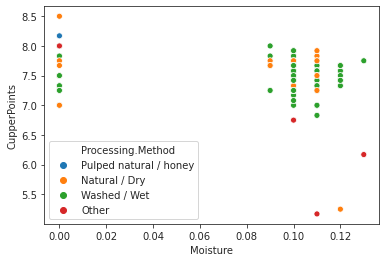

In [41]:
sns.scatterplot( df[ "Moisture"], df["CupperPoints"] , hue=df["Processing.Method"])
plt.show()